In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img= cv2.imread("D:\p_one\model\dev\download.jpeg")


In [3]:
#plt.imshow(img)

print(type(img))  
#print(img.type) 
if img is None:
    print("Error: Image not loaded. Check the file path!")
else:
    print("Image loaded successfully!")

<class 'numpy.ndarray'>
Image loaded successfully!


In [4]:
img[:,:].shape


(260, 193, 3)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(260, 193)

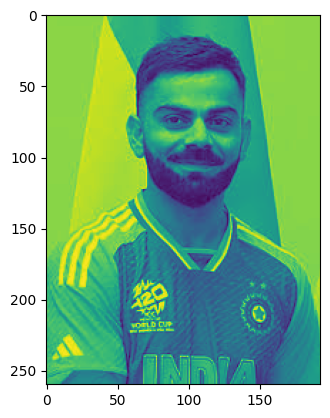

In [6]:
plt.imshow(gray)

In [7]:
#face_cascade=cv2.CascadeClassifier("D:\p_one\model\opencv2\haarcascade_frontalface_default.xml")
#eye_casecade=cv2.CascadeClassifier("D:\p_one\model\opencv2\haarcascade_eye.xml")
eye_casecade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[57, 38, 95, 95]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(57, 38, 95, 95)

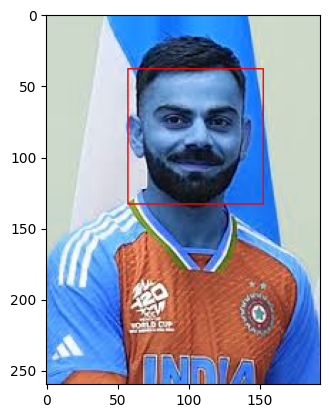

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
plt.imshow(face_img)

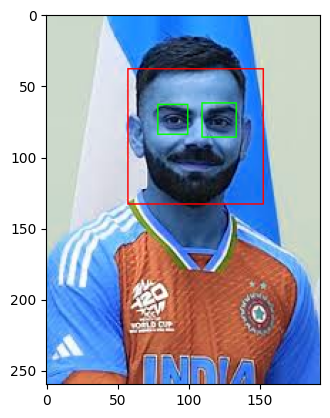

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]

    eyes=eye_casecade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

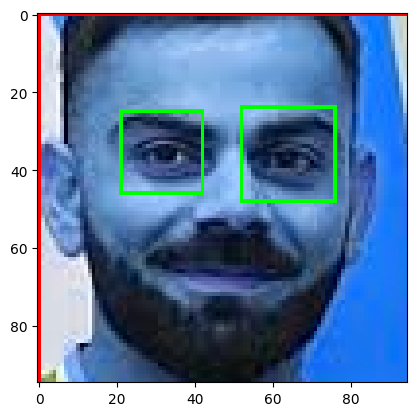

In [11]:
plt.imshow(roi_color)

In [12]:
def get_cropped_img_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_casecade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

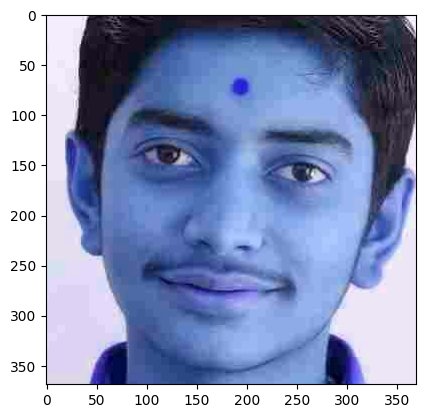

In [13]:
s1=get_cropped_img_if_2_eyes("D:\p_one\model\dev\photo whith compresed.jpeg")
plt.imshow(s1,cmap='gray')

In [14]:
path_to_data='D:\p_one\model\dataset'
path_to_cr_data="D:\p_one\model\cropped"

In [15]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['D:\\p_one\\model\\dataset\\Hrithik_roshan',
 'D:\\p_one\\model\\dataset\\Leo_messi',
 'D:\\p_one\\model\\dataset\\Prabhas',
 'D:\\p_one\\model\\dataset\\Smriti_mandhana',
 'D:\\p_one\\model\\dataset\\Yami_gautam']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cropped_img_dir=[]
cel_file_name_dict={}

for img_dir in img_dirs:
    count=1
    cel_name=img_dir.split('\\')[-1]
    print(cel_name)
    cel_file_name_dict[cel_name]=[]

    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data +"\\"+ cel_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print("Genreting cropped img in folder ",cropped_folder)

            cropped_file_name=cel_name+ str(count)+".png"
            cropped_file_path=cropped_folder + '\\'+cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            cel_file_name_dict[cel_name].append(cropped_file_path)
            count+=1
                
        

Hrithik_roshan
Genreting cropped img in folder  D:\p_one\model\cropped\Hrithik_roshan
Leo_messi
Genreting cropped img in folder  D:\p_one\model\cropped\Leo_messi
Prabhas
Genreting cropped img in folder  D:\p_one\model\cropped\Prabhas
Smriti_mandhana
Genreting cropped img in folder  D:\p_one\model\cropped\Smriti_mandhana
Yami_gautam
Genreting cropped img in folder  D:\p_one\model\cropped\Yami_gautam


In [19]:
class_dict={}
count=0
for celebrity_name in cel_file_name_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'Hrithik_roshan': 0,
 'Leo_messi': 1,
 'Prabhas': 2,
 'Smriti_mandhana': 3,
 'Yami_gautam': 4}

In [20]:
import pywt

def w2d (img, mode='haar',leval=1):
    imArry=img
    imArry=cv2.cvtColor(imArry,cv2.COLOR_RGB2GRAY)

    imArry=np.float32(imArry)
    imArry=imArry/255

    coeffs=pywt.wavedec2(imArry,mode,level=leval)

    coeffs_H=list(coeffs)
    coeffs_H[0]*=0

    imArry_H=pywt.waverec2(coeffs_H,mode)
    imArry_H*=255
    imArry_H=np.uint8(imArry_H)

    return imArry_H

    
    

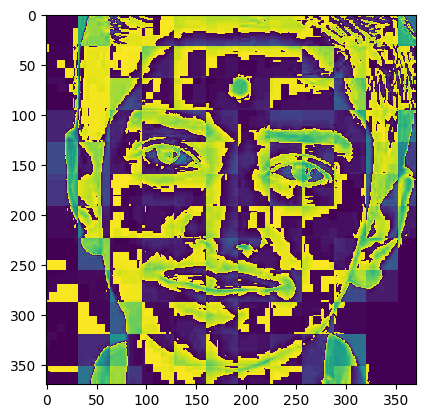

In [21]:
im_har=w2d(s1,'db1',5)
plt.imshow(im_har)

In [22]:
x,y=[],[]
for celebrity_name,training_files in cel_file_name_dict.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_her=w2d(img,'db1',5)
        scalled_img_her=cv2.resize(im_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_her.reshape(32*32,1)))
        x.append(combined_img)
        
        y.append(class_dict[celebrity_name])

In [23]:
len(x[0])

4096

In [24]:
x=np.array(x).reshape(len(x),4096).astype('float32')

In [25]:
y=np.array(y)

In [26]:
y.shape

(218,)

In [27]:
x.shape

(218, 4096)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [30]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8409090909090909

In [31]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.83      0.91         6
           2       1.00      0.78      0.88         9
           3       0.62      1.00      0.77        10
           4       1.00      0.77      0.87        13

    accuracy                           0.84        44
   macro avg       0.89      0.84      0.85        44
weighted avg       0.89      0.84      0.85        44



In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.856134,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.615294,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.861849,{'logisticregression__C': 1}


In [35]:
best_estimators['svm'].score(x_test,y_test)

0.8181818181818182

In [36]:
best_estimators['random_forest'].score(x_test,y_test)

0.7045454545454546

In [37]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9318181818181818

In [38]:
best_clf = best_estimators['logistic_regression']

In [39]:
import joblib 

In [40]:
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [41]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))